<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/projects/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>-</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>3</th>
    <th>average pooling</th>
    <th>6</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>0</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convoluation</th>
    <th>16</th>
    <th>14*14</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>-</th>
  </tr>
  <tr>
    <th>5</th>
    <th>convoluation</th>
    <th>16</th>
    <th>14*14</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>6</th>
    <th>average pooling</th>
    <th>16</th>
    <th>13*13</th>
    <th>2*2</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU</th>
  </tr>
    <tr>
    <th>7</th>
    <th>convoluation</th>
    <th>32</th>
    <th>11*11</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>-</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convoluation</th>
    <th>32</th>
    <th>9*9</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>9</th>
    <th>average pooling</th>
    <th>32</th>
    <th>8*8</th>
    <th>2*2</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU</th>
  </tr>
  </tr>
  <tr>
    <th>10</th>
    <th>convoluation</th>
    <th>64</th>
    <th>8*8</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>-</th>
  </tr>
  <tr>
    <th>11</th>
    <th>convoluation</th>
    <th>64</th>
    <th>8*8</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>12</th>
    <th>average pooling</th>
    <th>64</th>
    <th>4*4</th>
    <th>2*2</th>
    <th>2</th>
    <th>0</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>13</th>
    <th>fully connected</th>
    <th>-</th>
    <th>240</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>14</th>
    <th>fully connected</th>
    <th>-</th>
    <th>168</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>10</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>


датасет: MNIST

размер обучающей выборки:60000

размер тестирующей выборки: 10000

функция потерь: кросс энтропия

оптимизатор: Адам

скорость обучение: 0.001

размер батча: 1000

количество эпох: 200

количество парамтеров модели: 361080


In [1]:
import torch
import torchvision.datasets
import numpy as np
from tqdm import tqdm_notebook as bar

mnist_train = torchvision.datasets.MNIST('./', download = True, train = True)
mnist_test = torchvision.datasets.MNIST('./', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_data = mnist_train.data.unsqueeze(1).float().to(device)
train_labels = mnist_train.targets.to(device)
test_data = mnist_test.data.unsqueeze(1).float().to(device)
test_labels = mnist_test.targets.to(device)

train_accuracy_history = []
test_accuracy_history = []

class LeNet(torch.nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, padding = 1)
    self.conv2 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, padding = 1)
    self.conv4 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act3 = torch.nn.ReLU()
    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 1)
    self.act4 = torch.nn.ReLU()
    self.conv5 = torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, padding = 0)
    self.conv6 = torch.nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, padding = 0)
    self.act5 = torch.nn.ReLU()
    self.pool3 = torch.nn.AvgPool2d(kernel_size = 2, stride = 1)
    self.act6 = torch.nn.ReLU()
    self.conv7 = torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)
    self.conv8 = torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1)
    self.act7 = torch.nn.ReLU()
    self.pool4 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act8 = torch.nn.ReLU()
    self.fc1 = torch.nn.Linear(64*4*4, 240)
    self.act9 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(240, 168)
    self.act10 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(168, 10)


  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.act1(x)
    x = self.pool1(x)
    x = self.act2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.act3(x)
    x = self.pool2(x)
    x = self.act4(x)
    x = self.conv5(x)
    x = self.conv6(x)
    x = self.act5(x)
    x = self.pool3(x)
    x = self.act6(x)
    x = self.conv7(x)
    x = self.conv8(x)
    x = self.act7(x)
    x = self.pool4(x)
    x = self.act8(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act9(x)
    x = self.fc2(x)
    x = self.act10(x)
    x = self.fc3(x)
    return x

lenet = LeNet().to(device)

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)

batch_size = 1000

print(sum(p.numel() for p in lenet.parameters()))

361080


In [2]:
for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    train_data_batch = train_data[batch_indexes].to(device)
    train_labels_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(train_data_batch)

    loss_val = loss(preds, train_labels_batch)
    loss_val.backward()

    optimizer.step()

  train_preds = 0

  for start_index in range(0, len(train_data), batch_size):
    batch_indexes = order[start_index:start_index + batch_size]

    train_data_batch = train_data[batch_indexes].to(device)
    train_labels_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(train_data_batch)

    train_preds += (preds.argmax(dim=1) == train_labels_batch).float().sum().data.cpu()

  test_preds = lenet.forward(test_data)

  train_accuracy_history.append(train_preds/60000)
  test_accuracy_history.append((test_preds.argmax(dim = 1) == test_labels).float().mean().data.cpu())

<ipython-input-2-c0754ae010de>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(200), desc = 'learning'):


learning:   0%|          | 0/200 [00:00<?, ?it/s]

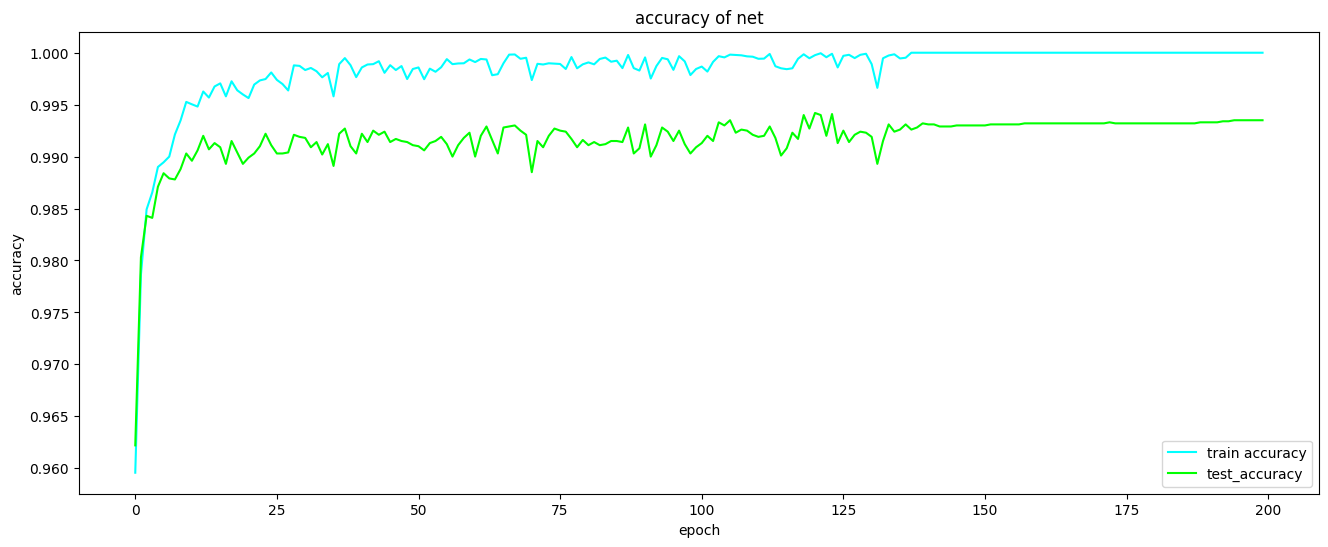

In [3]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)

plt.plot(range(200), train_accuracy_history, c='cyan', label = 'train accuracy')
plt.plot(range(200), test_accuracy_history, c = 'lime', label = 'test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy of net')
plt.legend(loc = 'lower right')

(0.99, 1.02)

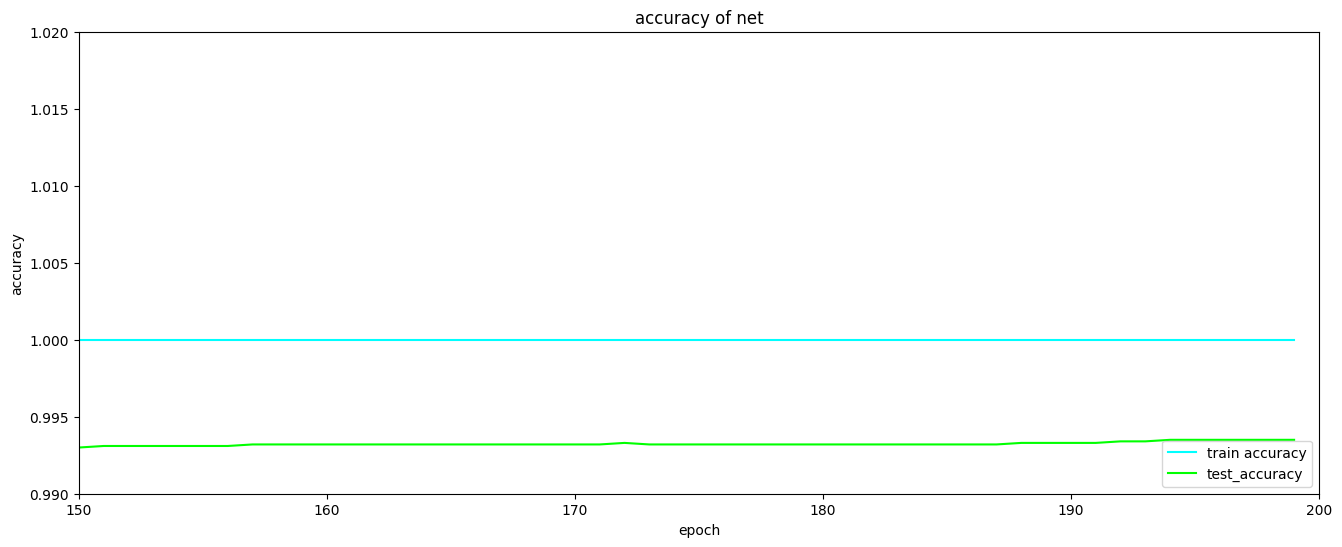

In [6]:
plt.plot(range(200), train_accuracy_history, c='cyan', label = 'train accuracy')
plt.plot(range(200), test_accuracy_history, c = 'lime', label = 'test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy of epoch 150-200')
plt.legend(loc = 'lower right')
plt.xlim(150, 200)
plt.ylim(0.99, 1.02)

(0.99275, 0.99375)

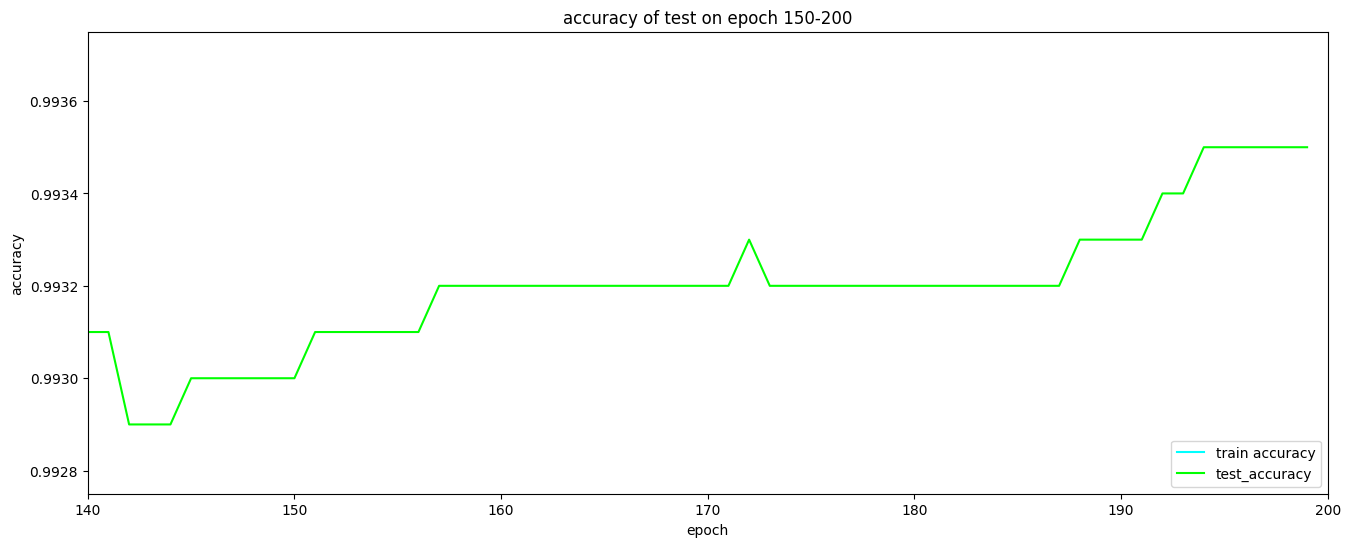

In [10]:
plt.plot(range(200), train_accuracy_history, c='cyan', label = 'train accuracy')
plt.plot(range(200), test_accuracy_history, c = 'lime', label = 'test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy of test on epoch 150-200')
plt.legend(loc = 'lower right')
plt.xlim(140, 200)
plt.ylim(0.99275, 0.99375)